In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE

In [2]:
articledf = pd.read_csv('../data/article_preprocessed.csv')

In [3]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/adityagoyal/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/adityagoyal/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/adityagoyal/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/adityagoyal/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/adityagoyal/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is a

True

In [4]:
articledf['tokens'] = articledf['article'].apply(lambda x: word_tokenize(x.lower()))

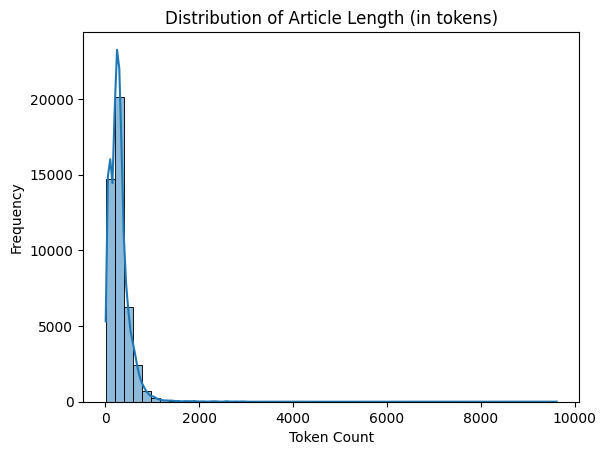

In [9]:
# Token counts per record
articledf['length'] = articledf['tokens'].apply(len)

sns.histplot(articledf['length'], bins=50, kde=True)
plt.title("Distribution of Article Length (in tokens)")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.show()

In [5]:
sentences = articledf['tokens'].tolist()

In [6]:
w2v_model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    sg=1
)

In [12]:
articledf.to_csv('../data/article_preprocessed.csv', index=False)

In [7]:
w2v_model.save("../models/word2vec_fake_news.model")

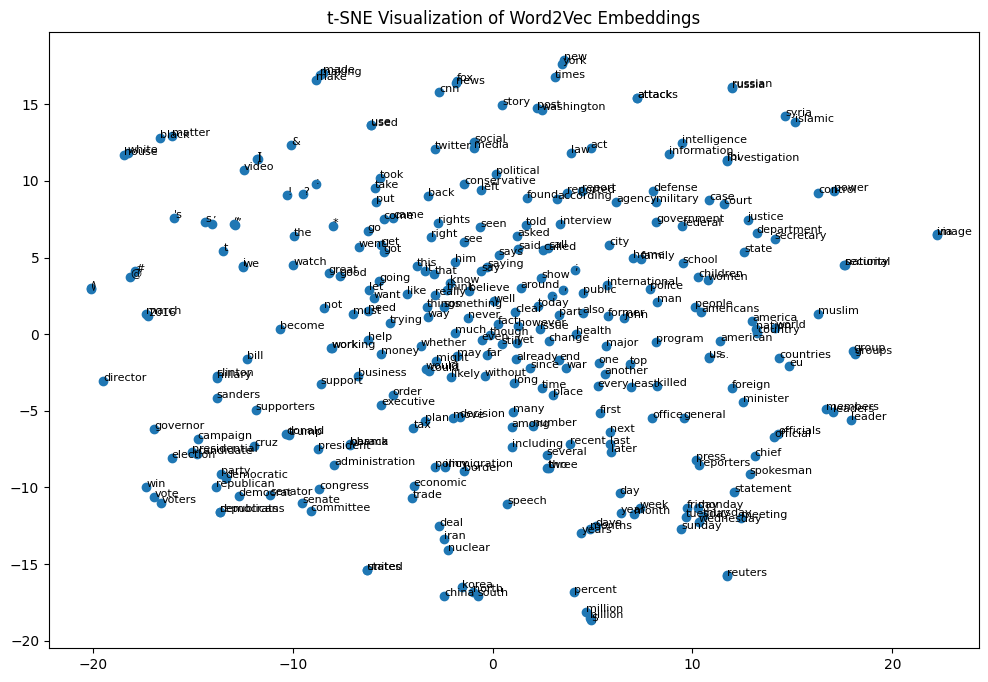

In [11]:
words = list(w2v_model.wv.index_to_key[:300])
word_vectors = np.array([w2v_model.wv[word] for word in words])

# Reduce to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
word_vecs_2d = tsne.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(word_vecs_2d[:, 0], word_vecs_2d[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vecs_2d[i, 0], word_vecs_2d[i, 1]), fontsize=8)
plt.title("t-SNE Visualization of Word2Vec Embeddings")
plt.show()